In [1286]:
# Import essential libraries for data analysis and visualization
import pandas as pd              # Data manipulation and analysis
import numpy as np               # Numerical operations and linear algebra
import matplotlib.pyplot as plt  # Basic plotting and visualization
import seaborn as sns            # Advanced and more aesthetic visualizations


In [1287]:
# Load the Titanic dataset from seaborn's built-in sample datasets.
df = sns.load_dataset("titanic")

In [1288]:
# Display the first 5 rows of the dataset
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [1289]:
# Show concise summary of the DataFrame:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [1290]:
# Generate descriptive statistics for numerical columns:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1291]:
# Count the total number of missing (NaN) values in each column
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [1292]:
# Drop the 'deck' column from the dataset
# Reason: it contains too many missing values to be useful for analysis

df.drop(columns=["deck"], inplace= True)

In [1293]:
# Import SimpleImputer from scikit-learn for handling missing values
from sklearn.impute import SimpleImputer

# Define imputers with different strategies:
imp_median = SimpleImputer(strategy="median")          # For numerical features (use median value)
imp_mode = SimpleImputer(strategy="most_frequent")     # For categorical features (use most frequent value)

# Apply median imputation to the 'age' column
df[["age"]] = imp_median.fit_transform(df[["age"]])

# Apply mode imputation to 'embark_town' and 'embarked' columns
df[["embark_town", "embarked"]] = imp_mode.fit_transform(df[["embark_town", "embarked"]])


In [1294]:
# Check for duplicate rows in the dataset
df.duplicated().sum()

np.int64(116)

In [1295]:
# Remove duplicate rows from the dataset
df.drop_duplicates(inplace= True)

In [1296]:
# Create a copy of the cleaned dataset
clean_df = df.copy()

In [1297]:
# Detect and handle outliers in the 'fare' column using the IQR method

# Calculate the 1st quartile (Q1) and 3rd quartile (Q3)
Q1 = df["fare"].quantile(0.25)
Q3 = df["fare"].quantile(0.75)

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define a threshold multiplier (3 * IQR)
threshold = 3

# Identify outliers (values below Q1 - threshold*IQR or above Q3 + threshold*IQR)
outliers = ((df["fare"] < Q1 - IQR * threshold) | (df["fare"] > Q3 + IQR * threshold))

# Remove outliers from the DataFrame
clean_df = clean_df[~outliers]

# Apply log transformation to the 'fare' column
# Log helps reduce skewness and normalize highly skewed data
clean_df["fare_log"] = np.log1p(clean_df["fare"])

# Drop the original 'fare' column after transformation
clean_df.drop(columns=["fare"], inplace=True)


In [1298]:
# Detect and remove outliers in the 'age' column using the IQR method

# Calculate the 1st quartile (Q1) and 3rd quartile (Q3)
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define a threshold multiplier (1.4 * IQR) - stricter than usual 1.5
threshold = 1.4

# Identify outliers (values below Q1 - threshold*IQR or above Q3 + threshold*IQR)
outliers = ((df["age"] < Q1 - IQR * threshold) | (df["age"] > Q3 + IQR * threshold))

# Remove outliers from 'clean_df'
clean_df = clean_df[~outliers]


In [1299]:
# Handle outliers in 'sibsp' (number of siblings/spouses aboard)

clean_df["sibsp"][clean_df["sibsp"] > 2] = clean_df["sibsp"].median()

# Handle outliers in 'parch' (number of parents/children aboard)

clean_df["parch"][clean_df["parch"] > 1] = clean_df["parch"].median()

# Suppress TensorFlow log messages for cleaner output
# Level '3' hides all logs except fatal errors
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'



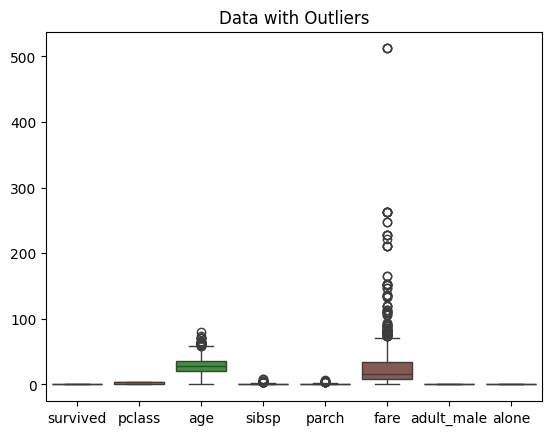

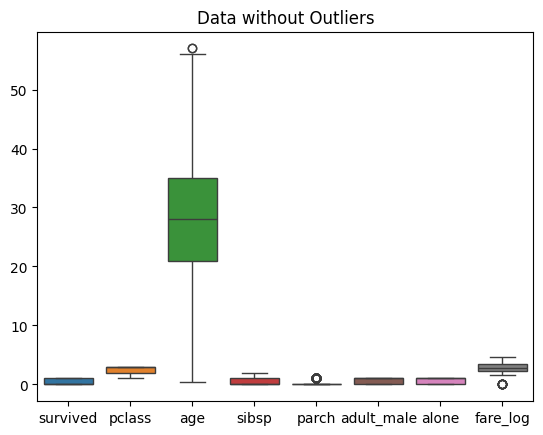

In [1300]:
# Boxplot of the original dataset (df) to visualize the presence of outliers
sns.boxplot(df)
plt.title("Data with Outliers")
plt.show()

# Boxplot of the cleaned dataset (clean_df) to confirm that outliers have been handled
sns.boxplot(clean_df)
plt.title("Data without Outliers")
plt.show()


In [1301]:
# Reset the index of the cleaned dataset after dropping rows (outliers).
clean_df.reset_index(inplace= True)

In [1302]:
# Drop the old 'index' column created during reset_index()
clean_df.drop(columns=["index"], inplace=True)

In [1303]:
clean_df

,survived,pclass,sex,age,sibsp,parch,embarked,class,who,adult_male,embark_town,alive,alone,fare_log
0,0,3,male,22.0,1,0,S,Third,man,True,Southampton,no,False,2.110213
1,1,1,female,38.0,1,0,C,First,woman,False,Cherbourg,yes,False,4.280593
2,1,3,female,26.0,0,0,S,Third,woman,False,Southampton,yes,True,2.188856
3,1,1,female,35.0,1,0,S,First,woman,False,Southampton,yes,False,3.990834
4,0,3,male,35.0,0,0,S,Third,man,True,Southampton,no,True,2.202765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,0,3,female,39.0,0,0,Q,Third,woman,False,Queenstown,no,False,3.405355
698,1,1,female,19.0,0,0,S,First,woman,False,Southampton,yes,True,3.433987
699,0,3,female,28.0,1,0,S,Third,woman,False,Southampton,no,False,3.196630
700,1,1,male,26.0,0,0,C,First,man,True,Cherbourg,yes,True,3.433987


In [1304]:
# Display concise summary of the cleaned dataset:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     702 non-null    int64   
 1   pclass       702 non-null    int64   
 2   sex          702 non-null    object  
 3   age          702 non-null    float64 
 4   sibsp        702 non-null    int64   
 5   parch        702 non-null    int64   
 6   embarked     702 non-null    object  
 7   class        702 non-null    category
 8   who          702 non-null    object  
 9   adult_male   702 non-null    bool    
 10  embark_town  702 non-null    object  
 11  alive        702 non-null    object  
 12  alone        702 non-null    bool    
 13  fare_log     702 non-null    float64 
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 62.6+ KB


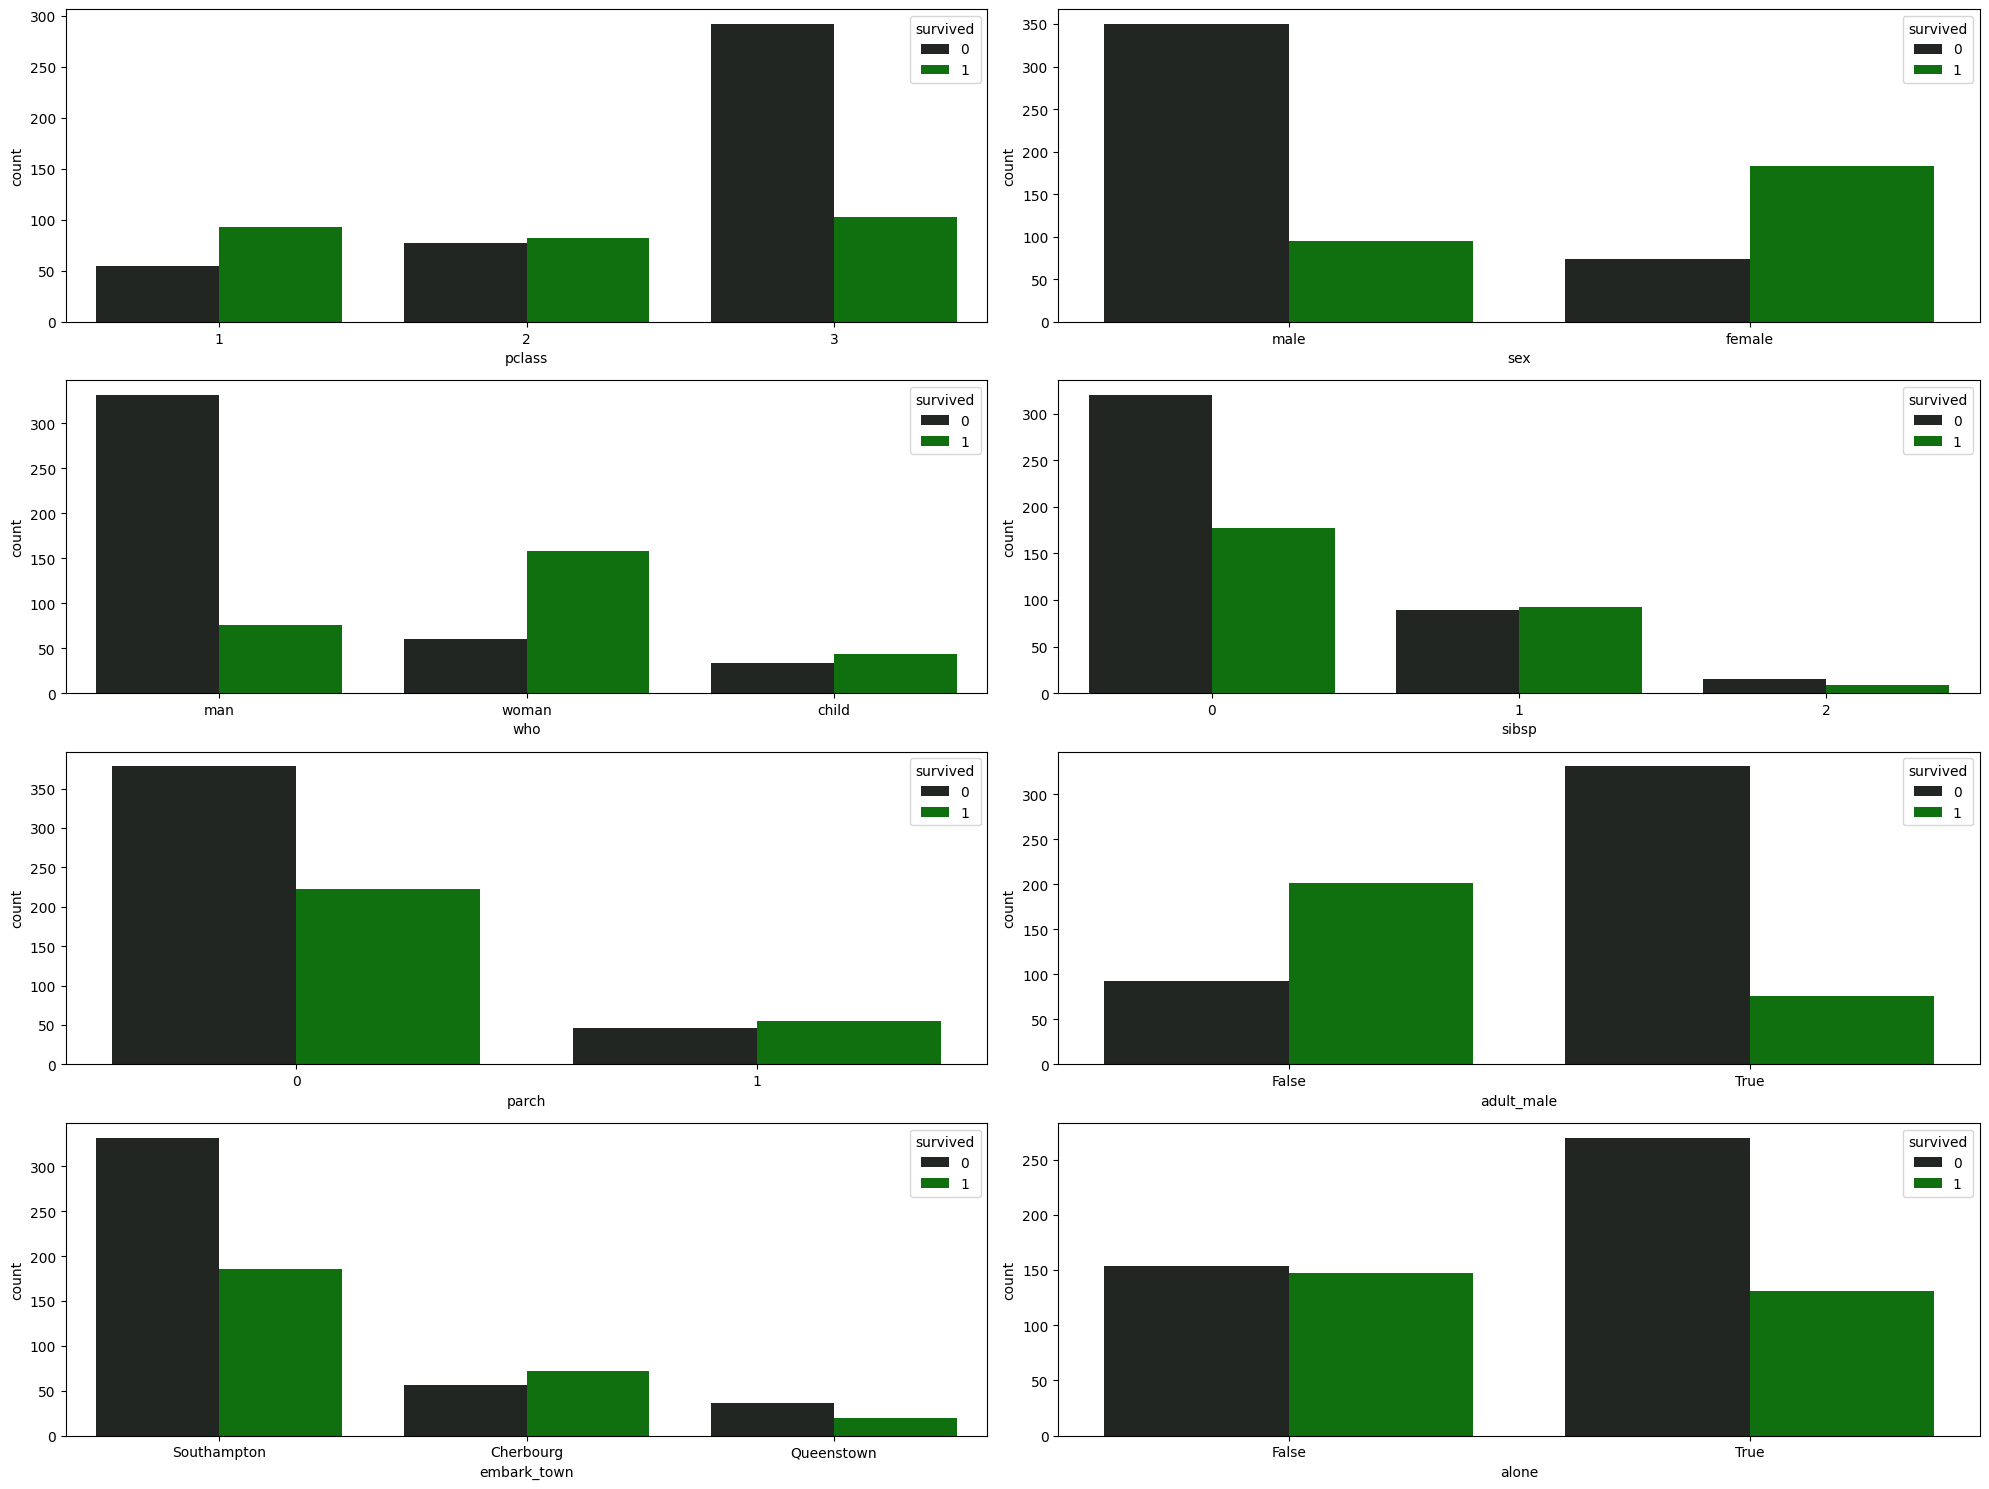

In [1305]:
# Define categorical columns to analyze survival distribution
cols_data = ['pclass', 'sex', 'who', 'sibsp', 'parch',
            'adult_male', 'embark_town', 'alone']

# Set up a grid of subplots (4 rows x 2 columns)
rows, cols = 4, 2
figs, axes = plt.subplots(rows, cols, figsize=(20, 15))

# Loop through each categorical column and plot survival distribution
for i, col in enumerate(cols_data):
    r, c = i // cols, i % cols   # Determine subplot position
    sns.countplot(
        data=clean_df, 
        x=col, 
        hue=clean_df["survived"],   # Compare counts between survived vs. not
        ax=axes[r, c], 
        palette="dark:g"            # Green shades for better visualization
    )

# Adjust layout for readability and display plots
plt.tight_layout()
plt.show()


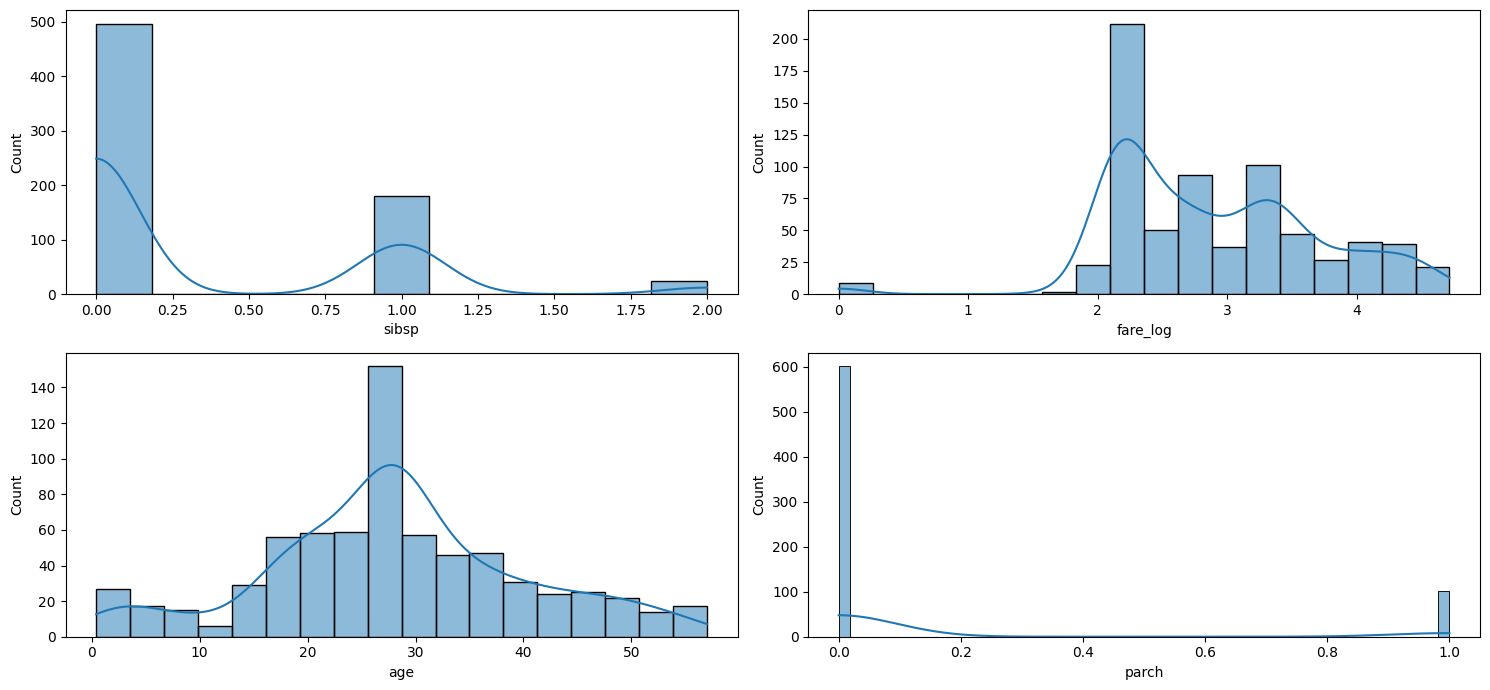

In [1306]:
# Define numerical columns to analyze their distributions
num_cols = ["sibsp", "fare_log", "age", "parch"]

# Set up a 2x2 grid of subplots
cols, rows = 2, 2
fig, axes = plt.subplots(rows, cols, figsize=(15, 7))

# Loop through each numerical column and plot its distribution
for i, col in enumerate(num_cols): 
    r, c = i // cols, i % cols   # Determine subplot position
    sns.histplot(
        data=clean_df, 
        x=col, 
        ax=axes[r, c], 
        kde=True                  # Add Kernel Density Estimation for smooth curve
    )

# Adjust layout and display histograms
plt.tight_layout()
plt.show()


In [1307]:
# Import different encoders for handling categorical data
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

# Initialize an OrdinalEncoder for the 'class' column
# Order is explicitly defined: First < Second < Third
ordinal_encoder = OrdinalEncoder(categories=[["First", "Second", "Third"]])

# Transform the 'class' column into numerical values based on the defined order
clean_df[["class"]] = ordinal_encoder.fit_transform(clean_df[["class"]])


In [1308]:
# Initialize a LabelEncoder for binary categorical features
label_encoder = LabelEncoder()

# Convert categorical string values into numerical labels (0 and 1):
clean_df["sex"] = label_encoder.fit_transform(clean_df["sex"])             # Male/Female → 0/1
clean_df["adult_male"] = label_encoder.fit_transform(clean_df["adult_male"]) # True/False → 0/1
clean_df["alive"] = label_encoder.fit_transform(clean_df["alive"])         # Yes/No → 0/1
clean_df["alone"] = label_encoder.fit_transform(clean_df["alone"])         # True/False → 0/1

In [1309]:
# Initialize OneHotEncoder for categorical features with multiple categories
one_hot_encoder = OneHotEncoder()

# Apply One-Hot Encoding to 'embarked', 'who', and 'embark_town' columns
# The result is a NumPy array where each category is represented as a binary column
encoded = one_hot_encoder.fit_transform(
    clean_df[["embarked", "who", "embark_town"]]
).toarray()

# Convert the encoded NumPy array into a DataFrame
# Use get_feature_names_out() to automatically generate column names
encoded = pd.DataFrame(
    encoded, 
    columns=one_hot_encoder.get_feature_names_out(["embarked", "who", "embark_town"])
)


In [1310]:
# Concatenate the original cleaned dataset with the newly encoded categorical features
# axis=1 means columns are added side by side
clean_df = pd.concat([clean_df, encoded], axis=1)

# Display the updated DataFrame with the new one-hot encoded columns included
clean_df


,survived,pclass,sex,age,sibsp,parch,embarked,class,who,adult_male,embark_town,alive,alone,fare_log,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,22.0,1,0,S,2.0,man,1,Southampton,0,0,2.110213,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,1,0,38.0,1,0,C,0.0,woman,0,Cherbourg,1,0,4.280593,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1,3,0,26.0,0,0,S,2.0,woman,0,Southampton,1,1,2.188856,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,1,0,35.0,1,0,S,0.0,woman,0,Southampton,1,0,3.990834,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0,3,1,35.0,0,0,S,2.0,man,1,Southampton,0,1,2.202765,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,0,3,0,39.0,0,0,Q,2.0,woman,0,Queenstown,0,0,3.405355,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
698,1,1,0,19.0,0,0,S,0.0,woman,0,Southampton,1,1,3.433987,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
699,0,3,0,28.0,1,0,S,2.0,woman,0,Southampton,0,0,3.196630,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
700,1,1,1,26.0,0,0,C,0.0,man,1,Cherbourg,1,1,3.433987,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [1311]:
# Drop the original categorical columns after encoding
clean_df.drop(columns=["embarked" , "who", "embark_town"] , inplace=True)

In [1312]:
# Display the updated DataFrame
clean_df

,survived,pclass,sex,age,sibsp,parch,class,adult_male,alive,alone,fare_log,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,22.0,1,0,2.0,1,0,0,2.110213,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,1,0,38.0,1,0,0.0,0,1,0,4.280593,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1,3,0,26.0,0,0,2.0,0,1,1,2.188856,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,1,0,35.0,1,0,0.0,0,1,0,3.990834,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0,3,1,35.0,0,0,2.0,1,0,1,2.202765,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,0,3,0,39.0,0,0,2.0,0,0,0,3.405355,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
698,1,1,0,19.0,0,0,0.0,0,1,1,3.433987,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
699,0,3,0,28.0,1,0,2.0,0,0,0,3.196630,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
700,1,1,1,26.0,0,0,0.0,1,1,1,3.433987,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [1313]:
# Import StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
standard_scaler = StandardScaler()

# Scale the 'fare_log' column to have mean = 0 and standard deviation = 1
# This helps normalize feature values for better model performance
clean_df["fare_log"] = standard_scaler.fit_transform(clean_df[["fare_log"]])



In [1314]:
# Display the updated DataFrame
clean_df

,survived,pclass,sex,age,sibsp,parch,class,adult_male,alive,alone,fare_log,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,22.0,1,0,2.0,1,0,0,-0.971794,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,1,0,38.0,1,0,0.0,0,1,0,1.698568,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1,3,0,26.0,0,0,2.0,0,1,1,-0.875034,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,1,0,35.0,1,0,0.0,0,1,0,1.342059,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0,3,1,35.0,0,0,2.0,1,0,1,-0.857921,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,0,3,0,39.0,0,0,2.0,0,0,0,0.621705,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
698,1,1,0,19.0,0,0,0.0,0,1,1,0.656933,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
699,0,3,0,28.0,1,0,2.0,0,0,0,0.364897,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
700,1,1,1,26.0,0,0,0.0,1,1,1,0.656933,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [1315]:
# Compute the correlation matrix between numerical features
# Drop specific categorical/encoded columns that are not needed in correlation analysis
cor = clean_df.drop(
    columns=["embarked_C", "embarked_Q", "embarked_S", "class", "alive", "alone"]
).corr(numeric_only=True)

# Display the correlation matrix
cor


,survived,pclass,sex,age,sibsp,parch,adult_male,fare_log,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
survived,1.000000,-0.317325,-0.491106,-0.083291,0.104792,0.124511,-0.502625,0.275907,0.125895,-0.502625,0.451144,0.160755,-0.023400,-0.126725
pclass,-0.317325,1.000000,0.085939,-0.334040,-0.103946,-0.017811,0.035075,-0.640172,0.163480,0.035075,-0.147824,-0.210712,0.191093,0.067273
sex,-0.491106,0.085939,1.000000,0.076807,-0.138613,-0.118160,0.892633,-0.210282,-0.102295,0.892633,-0.883119,-0.069993,-0.060011,0.098425
age,-0.083291,-0.334040,0.076807,1.000000,-0.003976,-0.206648,0.281162,0.083244,-0.634930,0.281162,0.128880,0.015740,-0.035150,0.007835
sibsp,0.104792,-0.103946,-0.138613,-0.003976,1.000000,0.227226,-0.143906,0.335678,0.066929,-0.143906,0.108309,0.063536,-0.041799,-0.030032
parch,0.124511,-0.017811,-0.118160,-0.206648,0.227226,1.000000,-0.251270,0.191309,0.336679,-0.251270,0.040660,0.037675,-0.030815,-0.014094
adult_male,-0.502625,0.035075,0.892633,0.281162,-0.143906,-0.251270,1.000000,-0.257743,-0.412279,1.000000,-0.788300,-0.053896,-0.068887,0.089759
fare_log,0.275907,-0.640172,-0.210282,0.083244,0.335678,0.191309,-0.257743,1.000000,0.110130,-0.257743,0.200567,0.212998,-0.133894,-0.104520
who_child,0.125895,0.163480,-0.102295,-0.634930,0.066929,0.336679,-0.412279,0.110130,1.000000,-0.412279,-0.235565,0.034946,-0.019221,-0.018840
who_man,-0.502625,0.035075,0.892633,0.281162,-0.143906,-0.251270,1.000000,-0.257743,-0.412279,1.000000,-0.788300,-0.053896,-0.068887,0.089759


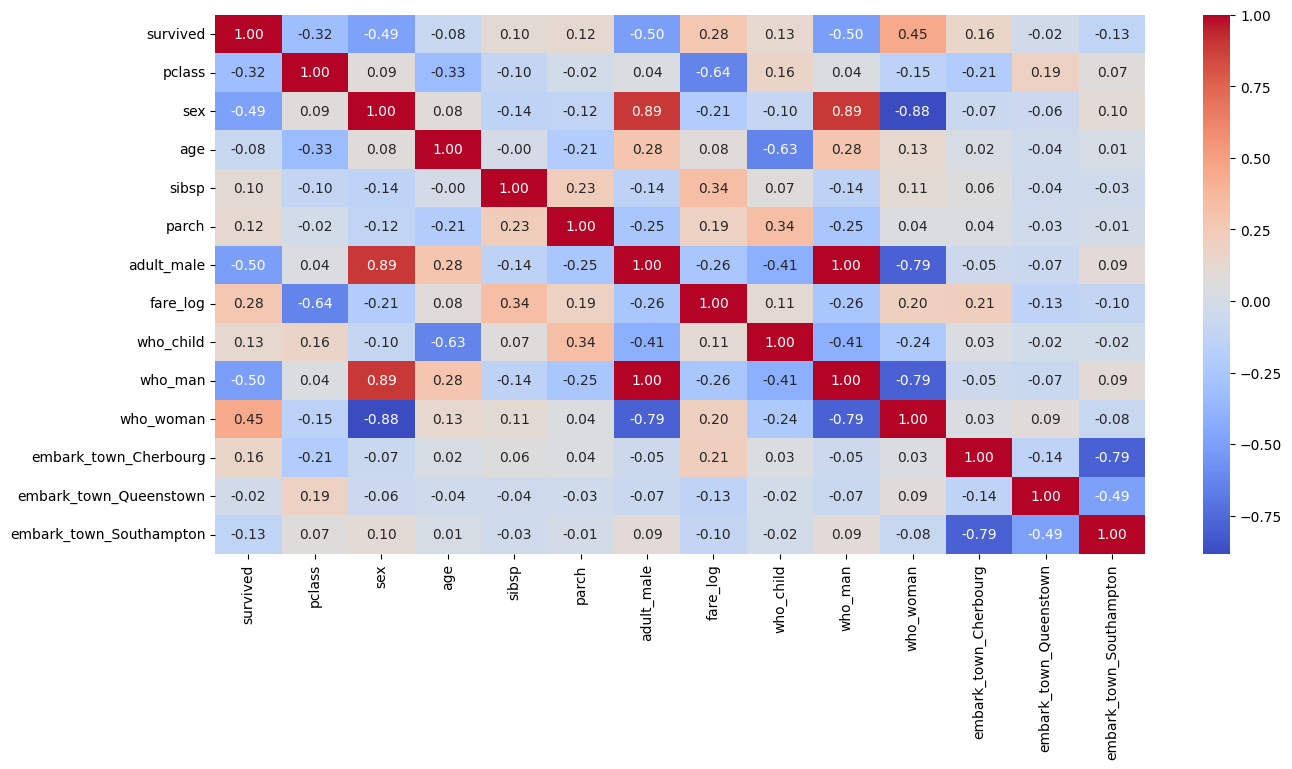

In [1316]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(cor, annot=True, cmap="coolwarm", fmt=".2f")  # 'annot=True' displays correlation values
plt.show()
